# Loan Amount Preddiction

Author : Prasad Patharvat

# Problem Statement
We have a banking dataset which have two csv files names training & testing set which is extracted from kaggle website. so now we have to predict the loan amount of that data by using differnt algorithms including machine learning & deep learning.

# Algoritm used :
Logistic regression

Decision Tree Regression

Random forest Regression

Adaboost Regression

Artificial Neural Network (MLPR)

# Import Libraries

In [1]:
# Import the required Libraries.

from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

# Read Dataset, Visualize & Analysis

In [2]:
Loan_Train = pd.read_csv("C:Desktop/Data Sets/training_set.csv")

In [3]:
#Loan_Train.head()
#Loan_Train.tail()
Loan_Train.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
369,LP002191,Male,Yes,0,Graduate,No,19730.0,5266.0,570.0,360.0,1.0,Rural,N
206,LP001693,Female,No,0,Graduate,No,3244.0,0.0,80.0,360.0,1.0,Urban,Y
306,LP001993,Female,No,0,Graduate,No,3762.0,1666.0,135.0,360.0,1.0,Rural,Y
452,LP002448,Male,Yes,0,Graduate,No,3948.0,1733.0,149.0,360.0,0.0,Rural,N
288,LP001931,Female,No,0,Graduate,No,4124.0,0.0,115.0,360.0,1.0,Semiurban,Y


In [4]:
Loan_Train.shape

(614, 13)

In [5]:
Loan_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [6]:
Loan_Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,612.000000,613.000000,592.000000,600.00000,564.000000
mean,5405.540850,1620.888940,146.412162,342.00000,0.842199
std,6118.914057,2928.624748,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2875.750000,0.000000,100.000000,360.00000,1.000000
50%,3806.000000,1167.000000,128.000000,360.00000,1.000000
75%,5803.750000,2302.000000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
Loan_Train = Loan_Train.drop(["Loan_ID"],axis=1)

# Missing Data Treatment

In [8]:
Loan_Train.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
def replacer(df):
    import pandas as pd 
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)

        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [10]:
replacer(Loan_Train)

In [11]:
Loan_Train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis  (EDA)

In [12]:
def EDA(df):
    import seaborn as sb
    import matplotlib.pyplot as plt
    
    cat = []
    con = []
    
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else: 
            con.append(i)
            
    for i in df[con]:
        sb.boxplot(df[i],color="r")
        plt.show()
        
        sb.distplot(df[i],color="b")
        plt.show()
        
        sb.scatterplot(df[i],Loan_Train.LoanAmount)
        plt.show()
        
    for i in df[cat]:
        sb.countplot(df[i],palette = "husl",hue = Loan_Train.Loan_Status)
        sb.boxplot(Loan_Train[i],Loan_Train.LoanAmount,hue = Loan_Train.Loan_Status)
        plt.show()

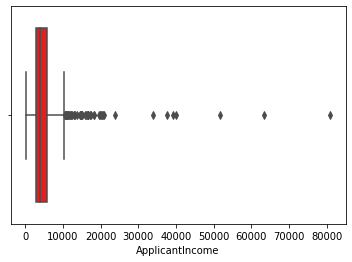

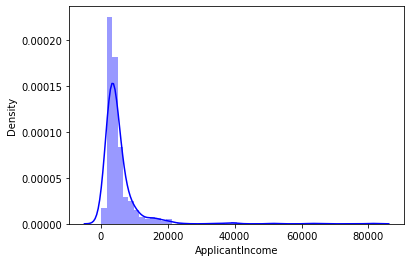

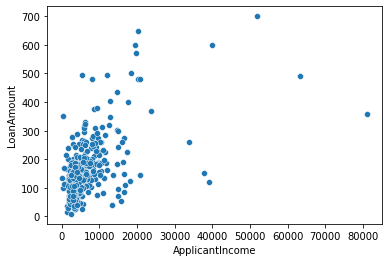

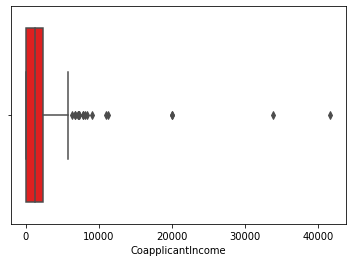

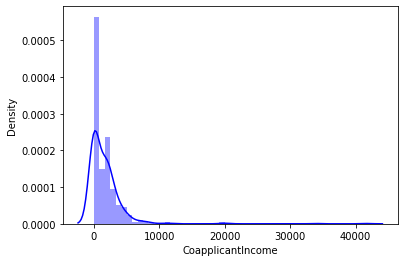

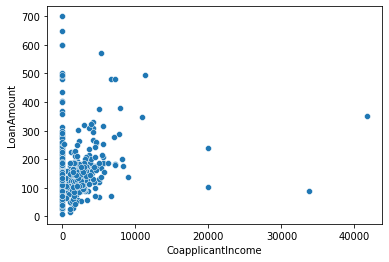

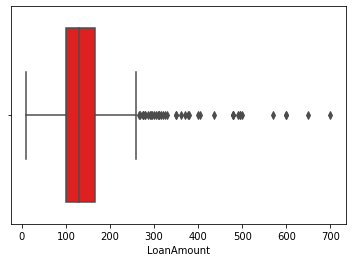

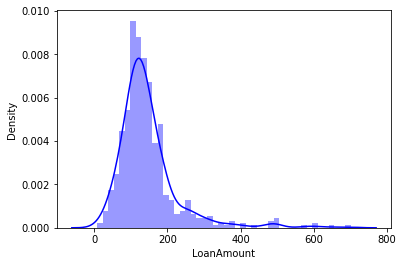

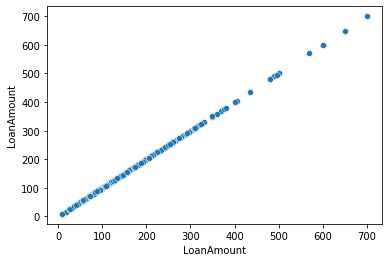

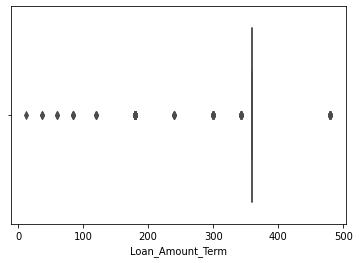

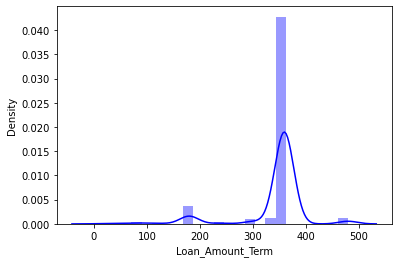

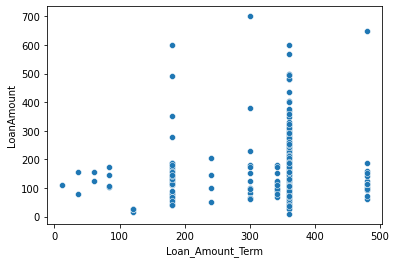

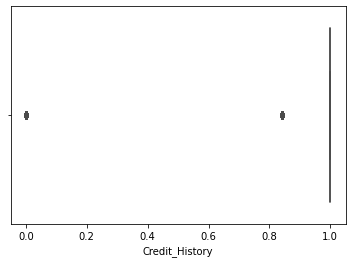

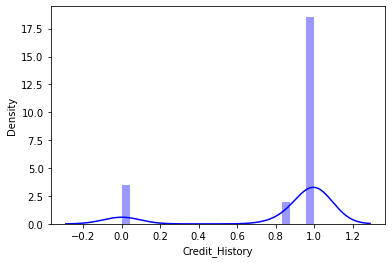

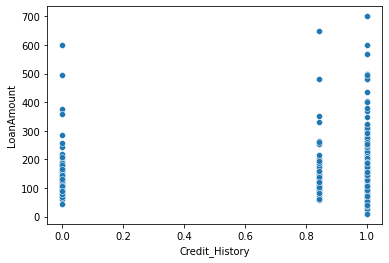

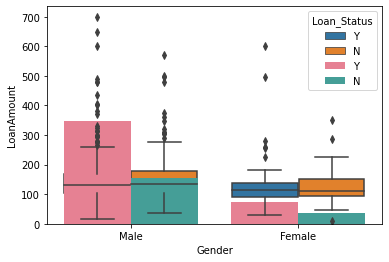

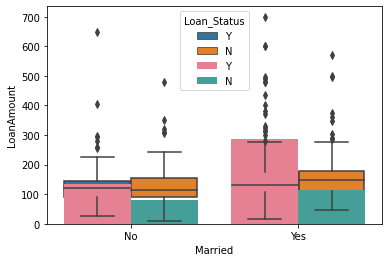

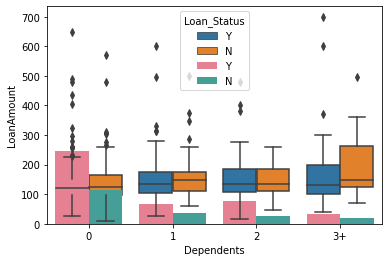

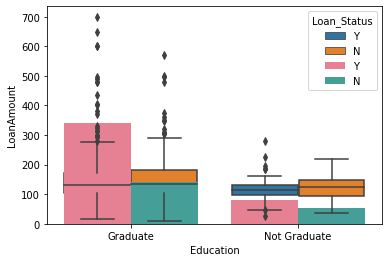

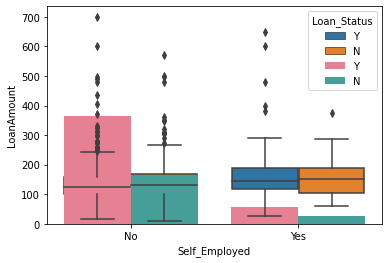

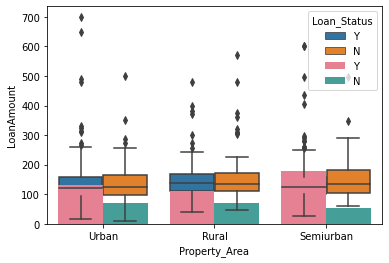

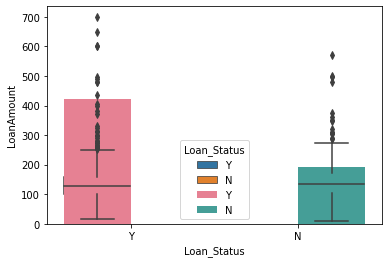

In [13]:
EDA(Loan_Train)

In [14]:
# ANOVA test for checking important categorical features
cat = []
con = []

for i in Loan_Train.columns:
    if(Loan_Train[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)
        
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,4)

imp_cat_cols = []
for i in cat:
    pval = ANOVA(Loan_Train,i,"LoanAmount")
    print("LoanAmount vs ",i,ANOVA(Loan_Train,i,"LoanAmount"))
    if(pval < 0.05):
        imp_cat_cols.append(i)

LoanAmount vs  Gender 0.0074
LoanAmount vs  Married 0.0003
LoanAmount vs  Dependents 0.0001
LoanAmount vs  Education 0.0
LoanAmount vs  Self_Employed 0.0042
LoanAmount vs  Property_Area 0.5255
LoanAmount vs  Loan_Status 0.3677


In [15]:
Loan_Train.corr()[["LoanAmount"]].sort_values(by=["LoanAmount"])

,LoanAmount
Credit_History,-0.007738
Loan_Amount_Term,0.038801
CoapplicantIncome,0.187884
ApplicantIncome,0.565552
LoanAmount,1.000000


In [16]:
Loan_Train = Loan_Train[Loan_Train.Loan_Status == "Y"]
# Here we are taking data which have loan status as Yes

# Define X and Y

In [17]:
X = Loan_Train.drop(["LoanAmount"],axis=1)
Y = Loan_Train[["LoanAmount"]]

In [18]:
Y_Original = Y[["LoanAmount"]]

In [19]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000.0,0.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417.0,4196.0,360.0,1.0,Urban,Y


In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             422 non-null    object 
 1   Married            422 non-null    object 
 2   Dependents         422 non-null    object 
 3   Education          422 non-null    object 
 4   Self_Employed      422 non-null    object 
 5   ApplicantIncome    422 non-null    float64
 6   CoapplicantIncome  422 non-null    float64
 7   Loan_Amount_Term   422 non-null    float64
 8   Credit_History     422 non-null    float64
 9   Property_Area      422 non-null    object 
 10  Loan_Status        422 non-null    object 
dtypes: float64(4), object(7)
memory usage: 39.6+ KB


In [21]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Preprocessing
Using one hot encoding (OHE) for categorical columns and
Standardscaler for continous columns

In [22]:
def preprocessing(df):
    
    import pandas as pd 
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
            
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns = con)
    X3 = X2.join(X1)
    return X3

In [23]:
Xnew = preprocessing(X)

In [24]:
Xnew.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.080550,-0.782349,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.414191,-0.782349,0.302222,0.227742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.486605,0.444235,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.106772,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.005531,1.400326,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [25]:
Xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          422 non-null    float64
 1   CoapplicantIncome        422 non-null    float64
 2   Loan_Amount_Term         422 non-null    float64
 3   Credit_History           422 non-null    float64
 4   Gender_Female            289 non-null    float64
 5   Gender_Male              289 non-null    float64
 6   Married_No               289 non-null    float64
 7   Married_Yes              289 non-null    float64
 8   Dependents_0             289 non-null    float64
 9   Dependents_1             289 non-null    float64
 10  Dependents_2             289 non-null    float64
 11  Dependents_3+            289 non-null    float64
 12  Education_Graduate       289 non-null    float64
 13  Education_Not Graduate   289 non-null    float64
 14  Self_Employed_No         2

In [26]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes != "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)

In [27]:
replacer(Xnew)

In [28]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.080550,-0.782349,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.414191,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.486605,0.444235,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.106772,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.005531,1.400326,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,-0.373903,0.232002,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
418,-0.431557,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
419,-0.222130,-0.782349,-2.574565,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
420,0.466583,-0.657506,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [29]:
import pandas as pd


# set index
index = pd.Index(range(0, 422, 1))
Y = Y.set_index(index)
print(Y)

     LoanAmount
0    146.412162
1     66.000000
2    120.000000
3    141.000000
4    267.000000
..          ...
417  108.000000
418   71.000000
419   40.000000
420  253.000000
421  187.000000

[422 rows x 1 columns]


In [30]:
Y

,LoanAmount
0,146.412162
1,66.000000
2,120.000000
3,141.000000
4,267.000000
...,...
417,108.000000
418,71.000000
419,40.000000
420,253.000000


# Outlier Treatment

In [31]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.080550,-0.782349,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.414191,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.486605,0.444235,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.106772,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.005531,1.400326,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,-0.373903,0.232002,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
418,-0.431557,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
419,-0.222130,-0.782349,-2.574565,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
420,0.466583,-0.657506,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
def outliers(df):
    T = []
    for i in range(0,len(df.columns)):
        for j in range(0,df.shape[0]):
            x = df.iloc[j,i]
            if((x>3)or(x<-3)):
                T.append(j)

    from numpy import unique
    rows_del = list(unique(T))
    return rows_del

In [33]:
outliers= outliers(Xnew)

In [34]:
Xnew = Xnew.drop(outliers)

In [35]:
import pandas as pd


# set index
index = pd.Index(range(0, 397, 1))
Xnew = Xnew.set_index(index)
print(Y)

     LoanAmount
0    146.412162
1     66.000000
2    120.000000
3    141.000000
4    267.000000
..          ...
417  108.000000
418   71.000000
419   40.000000
420  253.000000
421  187.000000

[422 rows x 1 columns]


In [36]:
Xnew

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.080550,-0.782349,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,-0.414191,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.486605,0.444235,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0.106772,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
4,0.005531,1.400326,0.302222,0.227742,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,-0.373903,0.232002,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
393,-0.431557,-0.782349,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
394,-0.222130,-0.782349,-2.574565,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
395,0.466583,-0.657506,0.302222,0.227742,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [37]:
Y = Y.drop(outliers)

In [38]:
Y

,LoanAmount
0,146.412162
1,66.000000
2,120.000000
3,141.000000
4,267.000000
...,...
417,108.000000
418,71.000000
419,40.000000
420,253.000000


# Divide Data in Training and Testing Set

In [39]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create Linear Regression Model

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model_lm = lm.fit(xtrain,ytrain)

In [41]:
pred_tr = model_lm.predict(xtrain)
pred_ts = model_lm.predict(xtest)

In [42]:
from sklearn.metrics import mean_squared_error
tr_err_lm = mean_squared_error(ytrain,pred_tr)
ts_err_lm = mean_squared_error(ytest,pred_ts)

print("training_error_lm :--->",tr_err_lm)
print("testing_error_lm :--->",ts_err_lm)

training_error_lm :---> 2927.54167329227
testing_error_lm :---> 2985.3689670139506


In [43]:
model_lm.coef_

array([[ 82.52235022,  36.1150437 ,   6.46044425,  -1.21725707,
         -5.25158045,   5.25158045,  -0.26100761,   0.26100761,
          5.35784172,  11.9132588 ,   6.81913869, -24.09023921,
         -3.47423378,   3.47423378,  -1.00757156,   1.00757156,
        -14.05038005,  -3.31000721,   1.61618686,   0.        ]])

In [44]:
model_lm.intercept_

array([147.67168495])

# Regularize 

In [45]:
from sklearn.model_selection import GridSearchCV

# Lasso Regularization -- (L1)

In [46]:
grid = []
x = 0.311
for i in range(0,100,1):
    x = x + 0.001
    x = round(x,4)
    grid.append(x)
    
from sklearn.linear_model import Lasso
ls = Lasso()
tg = {"alpha": grid}
cv = GridSearchCV(ls,tg,scoring = "neg_mean_squared_error",cv=3)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'alpha': 0.411}

In [47]:
grid = []
x = 0.311
for i in range(0,10,1):
    x = x + 0.001
    x = round(x,4)
    grid.append(x)


from sklearn.linear_model import Lasso

trerrs = []
tserrs = []
for i in grid:
    ls = Lasso(alpha=i)
    model_lasso = ls.fit(xtrain,ytrain)
    tr_pred = model_lasso.predict(xtrain)
    ts_pred = model_lasso.predict(xtest)
    from sklearn.metrics import mean_squared_error
    ts_err = mean_squared_error(ytest,ts_pred)
    tserrs.append(ts_err)
    tr_err = mean_squared_error(ytrain,tr_pred)
    trerrs.append(tr_err)
    print("alpha",i,"Training_Err",round(tr_err,4),"Testing_Err",round(ts_err,4),"\t",tr_err - ts_err )

alpha 0.312 Training_Err 2936.4934 Testing_Err 2936.3005 	 0.19283607186389418
alpha 0.313 Training_Err 2936.5464 Testing_Err 2936.1612 	 0.3851899751784913
alpha 0.314 Training_Err 2936.5996 Testing_Err 2936.0222 	 0.5773871937594777
alpha 0.315 Training_Err 2936.653 Testing_Err 2935.8836 	 0.769427727610946
alpha 0.316 Training_Err 2936.7066 Testing_Err 2935.7452 	 0.9613115767297131
alpha 0.317 Training_Err 2936.7603 Testing_Err 2935.6072 	 1.1530387411166885
alpha 0.318 Training_Err 2936.8142 Testing_Err 2935.4696 	 1.3446092207714173
alpha 0.319 Training_Err 2936.8682 Testing_Err 2935.3322 	 1.5360230156938997
alpha 0.32 Training_Err 2936.9225 Testing_Err 2935.1952 	 1.7272801258845902
alpha 0.321 Training_Err 2936.9769 Testing_Err 2935.0585 	 1.9183805513448533


In [48]:
from sklearn.linear_model import Lasso

trerrs = []
tserrs = []
for i in grid:
    ls = Lasso(alpha=0.311)
    model_lasso = ls.fit(xtrain,ytrain)
    tr_pred = model_lasso.predict(xtrain)
    ts_pred = model_lasso.predict(xtest)
    from sklearn.metrics import mean_squared_error
    ts_err = mean_squared_error(ytest,ts_pred)
    tserrs.append(ts_err)
    tr_err = mean_squared_error(ytrain,tr_pred)
    trerrs.append(tr_err)
    print("alpha",i,"\ttr_Err",round(tr_err,4),"\tts_Err",round(ts_err,4),"\t",tr_err - ts_err )

alpha 0.312 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.313 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.314 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.315 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.316 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.317 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.318 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.319 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.32 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303
alpha 0.321 	tr_Err 2936.4405 	ts_Err 2936.4402 	 0.00032548381886954303


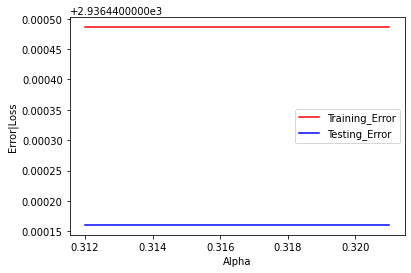

In [49]:
import matplotlib.pyplot as plt
plt.plot(grid,trerrs,c="red",label="Training_Error")
plt.plot(grid,tserrs,c="blue",label="Testing_Error")
plt.xlabel("Alpha")
plt.ylabel("Error|Loss")
plt.legend()
plt.show()

# Ridge Regularization -- (L2)

In [50]:
Q = []
x = 6.5
for i in range(0,10,1):
    x = x + 0.1
    x = round(x,4)
    Q.append(x)


from sklearn.linear_model import Ridge

for i in Q:
    rr = Ridge(alpha=i)
    model_rr = rr.fit(xtrain,ytrain)
    tr_pred = model_rr.predict(xtrain)
    ts_pred = model_rr.predict(xtest)
    from sklearn.metrics import mean_squared_error
    ts_err = mean_squared_error(ytest,ts_pred)
    tr_err = mean_squared_error(ytrain,tr_pred)
    print("alpha",i,"\ttr_Err",round(tr_err,4),"\tts_Err",round(ts_err,4),ts_err-tr_err)

alpha 6.6 	tr_Err 2942.3544 	ts_Err 2944.7057 2.351232154514946
alpha 6.7 	tr_Err 2942.7442 	ts_Err 2944.6035 1.8593775770837055
alpha 6.8 	tr_Err 2943.1376 	ts_Err 2944.5119 1.3743395039159623
alpha 6.9 	tr_Err 2943.5346 	ts_Err 2944.4306 0.8960125651919952
alpha 7.0 	tr_Err 2943.9353 	ts_Err 2944.3596 0.4242934397834688
alpha 7.1 	tr_Err 2944.3395 	ts_Err 2944.2986 -0.040919193610079674
alpha 7.2 	tr_Err 2944.7472 	ts_Err 2944.2475 -0.49972470394823176
alpha 7.3 	tr_Err 2945.1585 	ts_Err 2944.2062 -0.9522205540006325
alpha 7.4 	tr_Err 2945.5732 	ts_Err 2944.1747 -1.3985023451959933
alpha 7.5 	tr_Err 2945.9913 	ts_Err 2944.1526 -1.838663861230998


# Decision Tree for Regression Model

A decision tree is a type of supervised learning algorithm that can be used in classification as well as
regressor problems. The input to a decision tree can be both continuous as well as categorical. The
decision tree works on an if-then statement. Decision tree tries to solve a problem by using tree
representation (Node and Leaf).

In [51]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=21)
model = model_dtr.fit(xtrain,ytrain)

pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

print("training_error_dec_tree :-->", tr_err)
print("testing_error_dec_tree :-->", ts_err)

training_error_dec_tree :--> 0.22712933753943218
testing_error_dec_tree :--> 3724.210351990504


# Decision Tree Model has good training Error but give bad testing Error - model is overfitted

# Plot the tree

In [52]:
from sklearn.tree import export_graphviz
export_graphviz(model_dtr,out_file="D:/ETL/Decision_tree_loan.out")

In [53]:
#http://webgraphviz.com/

In [54]:
#pip install graphviz

In [55]:
#conda install -c conda-forge pydotplus

# Prunning of Decision Tree

In [56]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_leaf":range(2,500,1)}
dtr = DecisionTreeRegressor(random_state=21)

cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_leaf': 26}

In [57]:
from sklearn.model_selection import GridSearchCV
tg = {"min_samples_split":range(2,500,1)}
dtr = DecisionTreeRegressor(random_state=21)

cv = GridSearchCV(dtr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'min_samples_split': 68}

In [132]:
from sklearn.tree import DecisionTreeRegressor
model_dtr_leaf = DecisionTreeRegressor(random_state=21,min_samples_leaf=26)
model_dtr_leaf = model_dtr.fit(xtrain,ytrain)

pred_tr = model_dtr_leaf.predict(xtrain)
pred_ts = model_dtr_leaf.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

print("training_error_dec_tree :-->",tr_err)
print("training_error_dec_tree :-->",ts_err)

training_error_dec_tree :--> 2054.0542215588507
training_error_dec_tree :--> 2092.9344690269522


In [118]:
from sklearn.tree import DecisionTreeRegressor
model_dtr_split = DecisionTreeRegressor(random_state=21,min_samples_split=40)
model_dtr_split = model_dtr.fit(xtrain,ytrain)

pred_tr = model_dtr.predict(xtrain)
pred_ts = model_dtr.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

print("training_error_dec_tree :-->",tr_err)
print("training_error_dec_tree :-->",ts_err)

training_error_dec_tree :--> 2054.0542215588507
training_error_dec_tree :--> 2092.9344690269522


# Create Random Forest Regressor

Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [60]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21)
model_rfr = rfr.fit(xtrain,ytrain)

predtr2 = model_rfr.predict(xtrain)
predts2 = model_rfr.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_error_rfr = mean_squared_error(ytrain,predtr2)
ts_error_rfr = mean_squared_error(ytest,predts2)

print("training_error_rfr :-->",tr_error_rfr)
print("training_error_rfr :-->",ts_error_rfr)

training_error_rfr :--> 492.6326452785437
training_error_rfr :--> 2273.512218339235


# Random Forest Model has good training Error but bad testing Error - model is overfitted

In [61]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
rfr = RandomForestRegressor(random_state=21)

cv1 = GridSearchCV(rfr,tg,scoring="neg_mean_squared_error",cv=4)
cvmodel1 = cv1.fit(xtrain,ytrain)
cvmodel1.best_params_

{'n_estimators': 18}

In [72]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=18,random_state = 21,min_samples_split=40)
model_rfr = rfr.fit(xtrain,ytrain)

predtr2 = model_rfr.predict(xtrain)
predts2 = model_rfr.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_acc_rfr = mean_squared_error(ytrain,predtr2)
ts_acc_rfr = mean_squared_error(ytest,predts2)

print("training_error_rfr :", tr_acc_rfr)
print("testing_error_rfr :", ts_acc_rfr)

training_error_rfr : 2306.9446751671285
testing_error_rfr : 2416.070511613724


# Create Adaboost Regressor Model

An AdaBoost regressor. An AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction.

In [75]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21))
model_adr = abr.fit(xtrain,ytrain)

predtr2 = model_adr.predict(xtrain)
predts2 = model_adr.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err_adr = mean_squared_error(ytrain,predtr2)
ts_err_adr = mean_squared_error(ytest,predts2)

print("training_error_adr :", tr_err_adr)
print("testing_error_adr :", ts_err_adr)

training_error_adr : 22.28236477269323
testing_error_adr : 1926.0078182067202


# Adaboost Model has good training accuracy but give bad testing accuracy - model is overfitted

In [77]:
from sklearn.model_selection import GridSearchCV
tg = {"n_estimators":range(2,100,1)}
adr = AdaBoostRegressor(DecisionTreeRegressor(random_state=21))

cv1 = GridSearchCV(adr,tg,scoring="accuracy",cv=4)
cvmodel2 = cv1.fit(xtrain,ytrain)
cvmodel2.best_params_

{'n_estimators': 2}

In [79]:
from sklearn.ensemble import AdaBoostRegressor
abc = AdaBoostRegressor(DecisionTreeRegressor(random_state = 21,min_samples_split=40),n_estimators=2)
model_abc = abc.fit(xtrain,ytrain)

predtr2 = model_abc.predict(xtrain)
predts2 = model_abc.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err_abc = mean_squared_error(ytrain,predtr2)
ts_err_abc = mean_squared_error(ytest,predts2)

print("training_error_adr:", tr_err_abc)
print("testing_error_adr:", ts_err_abc)

training_error_adr: 2451.3078380696106
testing_error_adr: 2343.1771804528425


# ANN -- MLPR (Multi Layer Perceptron Regression)

MLPRegressor trains iteratively since at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update the parameters. It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.

In [84]:
from sklearn.neural_network import MLPRegressor
mlpr = MLPRegressor(hidden_layer_sizes=(100,100),random_state=21)
nn_mlpr = mlpr.fit(xtrain,ytrain)

tr_pred = nn_mlpr.predict(xtrain)
ts_pred = nn_mlpr.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)

print(tr_err,"    ",ts_err)

2889.56      2866.51


In [85]:
def NN_reg(xtrain,xtest,ytrain,ytest,mobj):
    nn = mobj.fit(xtrain,ytrain)
    tr_pred = nn.predict(xtrain)
    ts_pred = nn.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = round(mean_squared_error(ytrain,tr_pred),2)
    ts_err = round(mean_squared_error(ytest,ts_pred),2)
    print(tr_err,"    ",ts_err)

In [86]:
for i in range(2,50,1):
    for j in range(2,50,1):
        mlpr = MLPRegressor(hidden_layer_sizes=(i,j),random_state=21)
        print("==========",i,"=========",j,"=========")
        NN_reg(xtrain,xtest,ytrain,ytest,mlpr)

========== 2 ========= 2 =========
17074.75      16769.87
========== 2 ========= 3 =========
19318.19      18948.9
========== 2 ========= 4 =========
24784.7      24278.44
========== 2 ========= 5 =========
13846.26      13652.02
========== 2 ========= 6 =========
13244.17      13063.64
========== 2 ========= 7 =========
17498.48      17160.85
========== 2 ========= 8 =========
14936.53      14673.55
========== 2 ========= 9 =========
18575.83      18222.87
========== 2 ========= 10 =========
13189.25      12996.09
========== 2 ========= 11 =========
14619.16      14368.82
========== 2 ========= 12 =========
11720.55      11584.31
========== 2 ========= 13 =========
12394.77      12287.18
========== 2 ========= 14 =========
11881.99      11719.48
========== 2 ========= 15 =========
10531.67      10448.07
========== 2 ========= 16 =========
11930.53      11780.4
========== 2 ========= 17 =========
10271.07      10232.62
========== 2 ========= 18 =========
9444.81      9391.94
==========

5065.03      4968.65
========== 4 ========= 49 =========
5067.14      4966.85
========== 5 ========= 2 =========
14785.34      14554.87
========== 5 ========= 3 =========
14232.56      14027.57
========== 5 ========= 4 =========
20557.36      20099.3
========== 5 ========= 5 =========
23280.49      22810.91
========== 5 ========= 6 =========
16914.44      16586.73
========== 5 ========= 7 =========
18954.17      18576.5
========== 5 ========= 8 =========
19965.27      19569.78
========== 5 ========= 9 =========
11154.38      11019.11
========== 5 ========= 10 =========
9941.55      9898.0
========== 5 ========= 11 =========
7867.0      7911.01
========== 5 ========= 12 =========
7557.34      7442.06
========== 5 ========= 13 =========
8656.34      8561.05
========== 5 ========= 14 =========
6673.25      6636.34
========== 5 ========= 15 =========
8400.61      8247.67
========== 5 ========= 16 =========
9477.05      9382.04
========== 5 ========= 17 =========
7746.12      7603.26
======

4870.57      4684.47
========== 7 ========= 49 =========
4814.02      4624.78
========== 8 ========= 2 =========
14245.1      13824.24
========== 8 ========= 3 =========
7555.62      7327.35
========== 8 ========= 4 =========
15682.46      15228.26
========== 8 ========= 5 =========
6885.93      6582.87
========== 8 ========= 6 =========
13159.94      12766.34
========== 8 ========= 7 =========
9006.31      8632.22
========== 8 ========= 8 =========
9591.47      9203.57
========== 8 ========= 9 =========
5239.54      5055.84
========== 8 ========= 10 =========
5636.23      5445.15
========== 8 ========= 11 =========
5417.4      5174.25
========== 8 ========= 12 =========
4957.92      4745.44
========== 8 ========= 13 =========
5759.32      5554.29
========== 8 ========= 14 =========
7563.49      7261.09
========== 8 ========= 15 =========
5231.84      5128.5
========== 8 ========= 16 =========
5115.52      4986.16
========== 8 ========= 17 =========
5785.65      5500.64
========== 8 ==

4528.39      4665.03
========== 10 ========= 49 =========
4608.91      4791.89
========== 11 ========= 2 =========
7807.69      7658.49
========== 11 ========= 3 =========
7583.0      7490.7
========== 11 ========= 4 =========
5709.89      5699.94
========== 11 ========= 5 =========
7163.96      7048.4
========== 11 ========= 6 =========
7809.2      7612.51
========== 11 ========= 7 =========
5981.44      5903.38
========== 11 ========= 8 =========
9106.23      8906.98
========== 11 ========= 9 =========
9329.79      9199.85
========== 11 ========= 10 =========
5475.25      5496.05
========== 11 ========= 11 =========
4931.85      4962.75
========== 11 ========= 12 =========
5108.81      5088.79
========== 11 ========= 13 =========
5048.94      5100.96
========== 11 ========= 14 =========
4862.77      4970.61
========== 11 ========= 15 =========
4807.54      4984.35
========== 11 ========= 16 =========
4911.86      5066.41
========== 11 ========= 17 =========
4823.83      5053.68
=====

4213.89      4674.74
========== 13 ========= 47 =========
4214.04      4643.74
========== 13 ========= 48 =========
4214.42      4680.64
========== 13 ========= 49 =========
4244.56      4697.32
========== 14 ========= 2 =========
25418.76      24890.0
========== 14 ========= 3 =========
25643.36      25111.45
========== 14 ========= 4 =========
11050.77      10772.87
========== 14 ========= 5 =========
8450.72      8242.85
========== 14 ========= 6 =========
5391.1      5288.26
========== 14 ========= 7 =========
4988.94      4966.71
========== 14 ========= 8 =========
4857.11      4885.38
========== 14 ========= 9 =========
4692.76      4808.25
========== 14 ========= 10 =========
5144.15      5107.32
========== 14 ========= 11 =========
4848.76      4816.22
========== 14 ========= 12 =========
5064.41      5046.32
========== 14 ========= 13 =========
4511.97      4722.55
========== 14 ========= 14 =========
4618.24      4826.23
========== 14 ========= 15 =========
4762.27      4922.

4141.68      4456.01
========== 16 ========= 45 =========
4017.34      4379.49
========== 16 ========= 46 =========
4169.94      4496.62
========== 16 ========= 47 =========
4214.77      4514.73
========== 16 ========= 48 =========
4146.47      4483.46
========== 16 ========= 49 =========
4181.63      4482.11
========== 17 ========= 2 =========
9646.03      9246.12
========== 17 ========= 3 =========
7656.81      7323.99
========== 17 ========= 4 =========
5636.91      5395.85
========== 17 ========= 5 =========
5671.51      5468.42
========== 17 ========= 6 =========
11663.32      11258.39
========== 17 ========= 7 =========
4720.58      4686.7
========== 17 ========= 8 =========
5317.12      5092.64
========== 17 ========= 9 =========
4637.22      4666.37
========== 17 ========= 10 =========
4721.81      4825.24
========== 17 ========= 11 =========
4594.8      4653.46
========== 17 ========= 12 =========
4635.44      4645.96
========== 17 ========= 13 =========
4673.03      4745.39
=

3936.06      4079.76
========== 19 ========= 44 =========
3907.32      4027.0
========== 19 ========= 45 =========
3842.87      4015.57
========== 19 ========= 46 =========
3807.81      4040.99
========== 19 ========= 47 =========
3733.55      3938.11
========== 19 ========= 48 =========
3833.96      4001.23
========== 19 ========= 49 =========
3771.55      4009.09
========== 20 ========= 2 =========
12180.24      11793.25
========== 20 ========= 3 =========
9281.73      9009.36
========== 20 ========= 4 =========
7092.3      6795.4
========== 20 ========= 5 =========
4869.83      4671.24
========== 20 ========= 6 =========
5755.74      5438.0
========== 20 ========= 7 =========
4789.33      4686.38
========== 20 ========= 8 =========
4525.51      4431.07
========== 20 ========= 9 =========
4525.49      4382.49
========== 20 ========= 10 =========
4623.99      4500.18
========== 20 ========= 11 =========
5208.77      4949.14
========== 20 ========= 12 =========
4603.43      4388.79
===

3779.37      4006.92
========== 22 ========= 43 =========
3768.43      3965.54
========== 22 ========= 44 =========
3790.58      4018.45
========== 22 ========= 45 =========
3704.81      3959.62
========== 22 ========= 46 =========
3773.37      3962.14
========== 22 ========= 47 =========
3808.05      4041.58
========== 22 ========= 48 =========
3797.32      4027.63
========== 22 ========= 49 =========
3773.46      4027.73
========== 23 ========= 2 =========
11068.63      10738.22
========== 23 ========= 3 =========
10012.43      9664.6
========== 23 ========= 4 =========
4655.32      4636.59
========== 23 ========= 5 =========
6698.49      6467.89
========== 23 ========= 6 =========
4866.63      4708.18
========== 23 ========= 7 =========
6313.54      6077.98
========== 23 ========= 8 =========
5132.19      5010.49
========== 23 ========= 9 =========
4244.34      4380.59
========== 23 ========= 10 =========
4574.48      4507.93
========== 23 ========= 11 =========
4575.58      4590.26

3760.18      4090.43
========== 25 ========= 41 =========
3573.86      3871.24
========== 25 ========= 42 =========
3555.1      3882.71
========== 25 ========= 43 =========
3660.15      4006.18
========== 25 ========= 44 =========
3705.57      4044.06
========== 25 ========= 45 =========
3615.33      3917.08
========== 25 ========= 46 =========
3665.43      4002.87
========== 25 ========= 47 =========
3726.34      4042.2
========== 25 ========= 48 =========
3645.72      3994.64
========== 25 ========= 49 =========
3776.19      4124.4
========== 26 ========= 2 =========
9778.75      9443.41
========== 26 ========= 3 =========
5775.43      5627.27
========== 26 ========= 4 =========
5322.91      5118.0
========== 26 ========= 5 =========
10218.07      9850.97
========== 26 ========= 6 =========
5593.92      5428.6
========== 26 ========= 7 =========
25355.37      24828.29
========== 26 ========= 8 =========
4526.43      4596.96
========== 26 ========= 9 =========
11539.0      11205.48
==

3694.93      3979.79
========== 28 ========= 39 =========
3689.14      3957.86
========== 28 ========= 40 =========
3660.46      3943.04
========== 28 ========= 41 =========
3574.38      3828.86
========== 28 ========= 42 =========
3686.22      3980.58
========== 28 ========= 43 =========
3666.15      3939.74
========== 28 ========= 44 =========
3601.79      3883.79
========== 28 ========= 45 =========
3663.63      3940.22
========== 28 ========= 46 =========
3712.23      3955.61
========== 28 ========= 47 =========
3590.34      3875.77
========== 28 ========= 48 =========
3559.95      3848.1
========== 28 ========= 49 =========
3550.88      3802.93
========== 29 ========= 2 =========
8143.73      7847.39
========== 29 ========= 3 =========
7314.36      7055.36
========== 29 ========= 4 =========
6882.81      6659.38
========== 29 ========= 5 =========
8730.53      8422.67
========== 29 ========= 6 =========
25504.32      24974.42
========== 29 ========= 7 =========
4827.56      4749.4

3725.8      4032.95
========== 31 ========= 37 =========
3565.73      3885.61
========== 31 ========= 38 =========
3744.28      4011.96
========== 31 ========= 39 =========
3510.65      3736.25
========== 31 ========= 40 =========
3612.1      3863.44
========== 31 ========= 41 =========
3500.79      3859.05
========== 31 ========= 42 =========
3702.84      3980.41
========== 31 ========= 43 =========
3422.26      3685.0
========== 31 ========= 44 =========
3594.54      3875.86
========== 31 ========= 45 =========
3584.77      3856.75
========== 31 ========= 46 =========
3601.88      3875.74
========== 31 ========= 47 =========
3555.29      3841.58
========== 31 ========= 48 =========
3606.62      3887.0
========== 31 ========= 49 =========
3609.14      3907.71
========== 32 ========= 2 =========
25557.25      25026.52
========== 32 ========= 3 =========
5073.03      4959.61
========== 32 ========= 4 =========
4771.96      4746.08
========== 32 ========= 5 =========
4444.12      4521.3


3752.95      4106.63
========== 34 ========= 35 =========
3713.64      4099.05
========== 34 ========= 36 =========
3579.84      3947.55
========== 34 ========= 37 =========
3647.92      4005.22
========== 34 ========= 38 =========
3639.2      3971.61
========== 34 ========= 39 =========
3614.17      3973.66
========== 34 ========= 40 =========
3710.8      4105.36
========== 34 ========= 41 =========
3684.59      4032.0
========== 34 ========= 42 =========
3660.72      3990.14
========== 34 ========= 43 =========
3615.39      3970.13
========== 34 ========= 44 =========
3642.06      4024.17
========== 34 ========= 45 =========
3564.3      3903.38
========== 34 ========= 46 =========
3617.92      3990.37
========== 34 ========= 47 =========
3527.79      3871.6
========== 34 ========= 48 =========
3595.77      3969.51
========== 34 ========= 49 =========
3555.89      3905.34
========== 35 ========= 2 =========
12004.21      11649.78
========== 35 ========= 3 =========
8387.86      8110.7

3409.25      3646.06
========== 37 ========= 34 =========
3551.46      3836.6
========== 37 ========= 35 =========
3390.02      3668.39
========== 37 ========= 36 =========
3520.3      3832.66
========== 37 ========= 37 =========
3501.73      3745.81
========== 37 ========= 38 =========
3445.54      3716.96
========== 37 ========= 39 =========
3532.71      3809.78
========== 37 ========= 40 =========
3421.17      3707.96
========== 37 ========= 41 =========
3446.02      3695.72
========== 37 ========= 42 =========
3438.88      3697.13
========== 37 ========= 43 =========
3403.0      3648.09
========== 37 ========= 44 =========
3435.31      3682.27
========== 37 ========= 45 =========
3496.9      3748.29
========== 37 ========= 46 =========
3356.92      3592.97
========== 37 ========= 47 =========
3411.38      3697.64
========== 37 ========= 48 =========
3326.04      3549.92
========== 37 ========= 49 =========
3358.42      3587.32
========== 38 ========= 2 =========
4449.58      4375.6

3604.22      3883.17
========== 40 ========= 33 =========
3547.93      3790.52
========== 40 ========= 34 =========
3426.83      3708.92
========== 40 ========= 35 =========
3565.52      3845.32
========== 40 ========= 36 =========
3392.92      3651.01
========== 40 ========= 37 =========
3425.68      3698.4
========== 40 ========= 38 =========
3618.41      3945.9
========== 40 ========= 39 =========
3518.33      3843.7
========== 40 ========= 40 =========
3494.87      3755.33
========== 40 ========= 41 =========
3389.17      3668.85
========== 40 ========= 42 =========
3462.63      3701.31
========== 40 ========= 43 =========
3302.72      3502.09
========== 40 ========= 44 =========
3462.8      3746.54
========== 40 ========= 45 =========
3232.81      3510.02
========== 40 ========= 46 =========
3383.79      3609.3
========== 40 ========= 47 =========
3464.61      3766.24
========== 40 ========= 48 =========
3261.68      3444.96
========== 40 ========= 49 =========
3418.35      3679.0

3594.28      3794.41
========== 43 ========= 32 =========
3373.87      3562.54
========== 43 ========= 33 =========
3391.78      3626.34
========== 43 ========= 34 =========
3602.65      3862.35
========== 43 ========= 35 =========
3504.52      3754.07
========== 43 ========= 36 =========
3453.92      3631.01
========== 43 ========= 37 =========
3344.98      3514.49
========== 43 ========= 38 =========
3445.43      3662.37
========== 43 ========= 39 =========
3398.53      3579.08
========== 43 ========= 40 =========
3483.93      3726.63
========== 43 ========= 41 =========
3433.3      3620.58
========== 43 ========= 42 =========
3346.88      3528.41
========== 43 ========= 43 =========
3343.27      3555.01
========== 43 ========= 44 =========
3326.13      3565.29
========== 43 ========= 45 =========
3422.68      3615.56
========== 43 ========= 46 =========
3386.19      3575.83
========== 43 ========= 47 =========
3330.77      3534.33
========== 43 ========= 48 =========
3301.38      34

3655.03      3915.36
========== 46 ========= 31 =========
3400.58      3604.33
========== 46 ========= 32 =========
3508.97      3750.69
========== 46 ========= 33 =========
3419.95      3635.41
========== 46 ========= 34 =========
3474.22      3730.08
========== 46 ========= 35 =========
3367.73      3578.03
========== 46 ========= 36 =========
3483.25      3675.66
========== 46 ========= 37 =========
3374.62      3652.11
========== 46 ========= 38 =========
3356.08      3564.59
========== 46 ========= 39 =========
3339.45      3546.44
========== 46 ========= 40 =========
3288.17      3491.74
========== 46 ========= 41 =========
3311.18      3472.59
========== 46 ========= 42 =========
3398.99      3619.61
========== 46 ========= 43 =========
3428.35      3662.81
========== 46 ========= 44 =========
3448.25      3695.99
========== 46 ========= 45 =========
3366.02      3564.38
========== 46 ========= 46 =========
3323.88      3537.3
========== 46 ========= 47 =========
3317.08      35

3459.43      3707.69
========== 49 ========= 30 =========
3175.65      3265.11
========== 49 ========= 31 =========
3261.4      3449.41
========== 49 ========= 32 =========
3372.44      3573.16
========== 49 ========= 33 =========
3430.07      3659.7
========== 49 ========= 34 =========
3352.92      3546.49
========== 49 ========= 35 =========
3309.04      3515.39
========== 49 ========= 36 =========
3311.58      3508.97
========== 49 ========= 37 =========
3278.02      3429.06
========== 49 ========= 38 =========
3488.04      3720.61
========== 49 ========= 39 =========
3235.25      3390.32
========== 49 ========= 40 =========
3247.18      3416.36
========== 49 ========= 41 =========
3372.85      3576.3
========== 49 ========= 42 =========
3336.15      3489.18
========== 49 ========= 43 =========
3185.33      3293.43
========== 49 ========= 44 =========
3163.57      3250.94
========== 49 ========= 45 =========
3201.2      3377.28
========== 49 ========= 46 =========
3282.22      3488.

In [87]:
mlpr = MLPRegressor(hidden_layer_sizes=(41,41),random_state=21) #19,33,  39,49   40,48  41,41
print("==========",i,"=========",j,"=========")
NN_reg(xtrain,xtest,ytrain,ytest,mlpr)

========== 49 ========= 49 =========
3230.97      3430.58


# Prepare test Data set

In [92]:
test_data_yes = pd.read_csv("D:ETL/test_data_yes.csv")

In [93]:
test_data_yes.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Log_Reg
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [94]:
test = test_data_yes.drop(["Loan_ID"],axis=1)

In [95]:
test.isna().sum()      #check any missing values in data set

Gender                  9
Married                 0
Dependents             10
Education               0
Self_Employed          14
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              4
Loan_Amount_Term        5
Credit_History         28
Property_Area           0
Loan_Status_Log_Reg     0
dtype: int64

In [96]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum(),columns=["ct"])
    for i in Q[Q.ct > 0].index:
        if(df[i].dtypes == "object"):
            x = df[i].mode()[0]
            df[i] = df[i].fillna(x)
        else:
            x = df[i].mean()
            df[i] = df[i].fillna(x)

In [97]:
replacer(test)
# replace missing values, if missing value is categorical then is mode and for continous use mean value

In [98]:
test.isna().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status_Log_Reg    0
dtype: int64

In [99]:
test = test.drop(labels = ["LoanAmount"],axis=1)

# Data Preprocessing on test Data set

In [100]:
def preprocessing(df):
    import pandas as pd
    cat = []
    con = []
    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
        else:
            con.append(i)
    X1 = pd.get_dummies(df[cat])
    from sklearn.preprocessing import StandardScaler
    ss = StandardScaler()
    X2 = pd.DataFrame(ss.fit_transform(df[con]),columns=con)
    X3 = X2.join(X1)
    return X3

In [101]:
test = preprocessing(test)

In [102]:
test.head()

,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Log_Reg_Y
0,0.168636,-0.650790,0.300182,6.291362e-02,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1,1
1,-0.360548,-0.038184,0.300182,6.291362e-02,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,1
2,0.024531,0.084337,0.300182,6.291362e-02,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1
3,-0.507855,0.389007,0.300182,-1.948763e-15,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1
4,-0.320519,-0.650790,0.300182,6.291362e-02,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1,1


In [104]:
Loan_Amount = test_data_yes[["Loan_ID"]]

In [105]:
Loan_Amount["Original"] = test_data_yes.LoanAmount

In [107]:
#Loan_Amount

# 1. Linear Regression

In [108]:
Linear = model_lm.predict(test)

In [109]:
Loan_Amount["Linear_Reg"] = Linear

# 2. Lasso Regression 

In [111]:
Lasso = model_lasso.predict(test)

In [112]:
Loan_Amount["Lasso_Reg"] = Lasso

# 3. Ridge Regression

In [113]:
Ridge = model_rr.predict(test)

In [115]:
Loan_Amount["Ridge_Reg"] = Ridge

# 4. Decision Tree - min_sample_leaf

In [119]:
Dec_min_leaf = model_dtr_leaf.predict(test)

In [120]:
Loan_Amount["Dec_min_leaf"] = Dec_min_leaf

# 5. Decision Tree -min_samples_split

In [122]:
Dec_min_split = model_dtr_split.predict(test)

In [123]:
Loan_Amount["Dec_min_split"] = Dec_min_split

# 6. Random Forest

In [124]:
Random_forest = model_rfr.predict(test)

In [125]:
Loan_Amount["Random_forest"] = Random_forest

# 7. Adaboost Regressor 

In [126]:
Ad_Reg = model_abc.predict(test)

In [127]:
Loan_Amount["Ad_Reg"] = Ad_Reg

# 8. ANN MLPR

In [128]:
ANN_MLPR = mlpr.predict(test)

In [129]:
Loan_Amount["ANN_MLPR"] = ANN_MLPR

In [130]:
Loan_Amount

,Loan_ID,Original,Linear_Reg,Lasso_Reg,Ridge,Ridge_Reg,Dec_min_leaf,Dec_min_split,Random_forest,Ad_Reg,ANN_MLPR
0,LP001015,110.0,147.952128,147.325593,148.175854,148.175854,162.461538,162.461538,176.562949,156.328010,150.127936
1,LP001022,126.0,132.962375,129.105493,132.999902,132.999902,112.967342,112.967342,123.398417,127.571429,143.932419
2,LP001031,208.0,164.070732,161.867680,162.098297,162.098297,144.315154,144.315154,145.046284,137.385636,159.612079
3,LP001035,100.0,131.216741,129.687163,132.005037,132.005037,137.589794,137.589794,130.606147,110.500000,140.451409
4,LP001051,78.0,114.012414,109.913419,113.911309,113.911309,107.861111,107.861111,111.827575,127.571429,111.888741
...,...,...,...,...,...,...,...,...,...,...,...
302,LP002971,113.0,125.417939,125.687784,131.566475,131.566475,144.315154,144.315154,142.952015,127.571429,121.820258
303,LP002975,115.0,132.610869,132.370825,134.226126,134.226126,107.861111,107.861111,117.089331,127.571429,142.224944
304,LP002980,126.0,131.180705,133.397345,131.955275,131.955275,144.315154,144.315154,137.312647,125.428571,138.105918
305,LP002986,158.0,155.689335,157.920947,156.507046,156.507046,144.315154,144.315154,159.685069,200.500000,161.444110
